In [34]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [35]:
Lx, Ly, nx, ny, alpha= 0.1, 0.1, 21, 21, 1e-4
dx= Lx/ (nx-1)
dy= Ly/ (ny-1)

In [36]:
x= numpy.linspace (0.0, Lx, num=nx)
y= numpy.linspace (0.0, Ly, num=ny)

#Initial Conditions
T0= 20.0 * numpy.ones((ny,nx))
T0[0,:]= 100.0 #Dirichlet BC

T0[:,0]= 100.0 #Dirichlet BC

In [37]:
def ftcs (T0, nt, dt, dx, dy, alpha):
    T = T0.copy()
    sigma_x= alpha * dt/ dx**2
    sigma_y= alpha * dt/ dy**2
    I= int(nx/2)
    J= int (ny/2)
    for n in range (nt):
        for i in range (1, ny-1):
            for j in range (1, nx-1):
                T[j, i]= (T[j, i]+ sigma_x* (T[j, i-1] - 2* T[j, i] + T[j, i+1]) + sigma_y* (T[j-1, i] - 2* T[j, i] + T[j+1, i]))
        
        T[0, :] = 100.0 #Bottom
        T[:, 0] = 100.0 #Left
        T[-1, :] = T[-2, :] # Top 
        T[:, -1] = T [ :, -2] # Right
        if T[J,I] >=70:
            break
    print ("Time Step {}; temperature at center is {} C". format (n, T[J,I]))        
    return T

In [38]:
sigma = 0.5
dt= sigma / (alpha* (1/dx**2 + 1/dy**2))
nt = 500

In [39]:
T= ftcs (T0, nt, dt, dx ,dy, alpha)

Time Step 127; temperature at center is 70.12723235676353 C


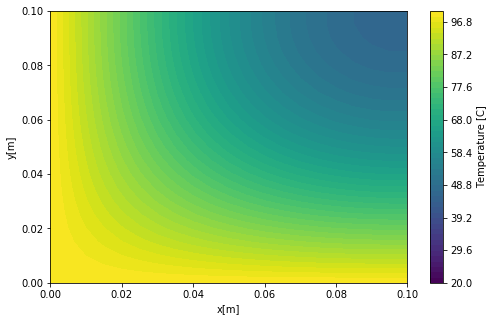

In [47]:
pyplot.figure (figsize=(8.0, 5.0))
pyplot.xlabel ('x[m]')
pyplot.ylabel ('y[m]')
contf= pyplot.contourf (x, y, T, levels= numpy.linspace(20.0, 100.0, num= 51))
cbar= pyplot.colorbar (contf)
cbar.set_label('Temperature [C]')